<a href="https://colab.research.google.com/github/vaishali071017/Funding-in-startups/blob/main/Funding_in_Starups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **💰Funding in startups💰**

In [2]:
import numpy as np
import pandas as pd
import gdown

In [3]:
!gdown 1K6fKsCSDN6NIotJtxUmKTg9b1Z8qVc9-

Downloading...
From: https://drive.google.com/uc?id=1K6fKsCSDN6NIotJtxUmKTg9b1Z8qVc9-
To: /content/investments_VC.csv
100% 12.5M/12.5M [00:00<00:00, 115MB/s] 


In [4]:
data = pd.read_csv("investments_VC.csv", encoding='ISO-8859-1')

In [5]:
data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.shape

(54294, 39)

In [7]:
data = data.dropna(how='all')

In [8]:
data.shape

(49438, 39)

In [9]:
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

# ✨ **Data Cleaning and Preprocessing**

### ***Assumption -*** Funding rounds from round_A to round_H are part of venture capital funding lifecycle

⏹ This project is focused on funding-oriented analysis, and thus columns such as 'permalink' and 'homepage_url' are not relevant to the core objectives and have been excluded from the analysis.

⏹ I will be using the 'founded_month' column, which will be correlated with 'first_funding_at' and 'last_funding_at' to analyze trends over specific years.

⏹ In addition, columns such as 'state_code' and 'city' will be excluded from the analysis, as the project focuses on broader regional and global funding trends rather than localized insights at the state or city level.

In [10]:
data = data.drop(columns = ['permalink', 'homepage_url', 'state_code', 'city', 'founded_at', 'founded_quarter', 'founded_year'])

In [11]:
data.columns

Index(['name', 'category_list', ' market ', ' funding_total_usd ', 'status',
       'country_code', 'region', 'funding_rounds', 'founded_month',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

In [12]:
data.columns = data.columns.str.replace(' ', '', regex=False)
data.columns

Index(['name', 'category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'region', 'funding_rounds', 'founded_month',
       'first_funding_at', 'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

In [13]:
data.shape

(49438, 32)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49438 entries, 0 to 49437
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   category_list         45477 non-null  object 
 2   market                45470 non-null  object 
 3   funding_total_usd     49438 non-null  object 
 4   status                48124 non-null  object 
 5   country_code          44165 non-null  object 
 6   region                44165 non-null  object 
 7   funding_rounds        49438 non-null  float64
 8   founded_month         38482 non-null  object 
 9   first_funding_at      49438 non-null  object 
 10  last_funding_at       49438 non-null  object 
 11  seed                  49438 non-null  float64
 12  venture               49438 non-null  float64
 13  equity_crowdfunding   49438 non-null  float64
 14  undisclosed           49438 non-null  float64
 15  convertible_note      49

In [15]:
data.dtypes

,0
name,object
category_list,object
market,object
funding_total_usd,object
status,object
country_code,object
region,object
funding_rounds,float64
founded_month,object
first_funding_at,object


In [16]:
data.name.nunique()

49350

In [17]:
data.funding_total_usd.value_counts()

,count
funding_total_usd,
-,8531
"10,00,000",925
"5,00,000",761
"1,00,000",749
"40,000",680
...,...
"1,79,26,365",1
"1,77,404",1
"2,52,052",1


In [18]:
data['funding_total_usd']=data['funding_total_usd'].str.replace(' ', '', regex=False)
data['funding_total_usd']=data['funding_total_usd'].str.replace(',', '', regex=False)
data['funding_total_usd']=data['funding_total_usd'].str.replace('-', '0', regex=False)
data.funding_total_usd=data.funding_total_usd.astype('float')
data.funding_rounds = data.funding_rounds.astype('int')

⏹ This analysis utilizes a yearly approach to highlight key trends in startup funding, allowing for clearer comparisons and insights year over year.

In [19]:
data['founded_month']=pd.to_datetime(data['founded_month'], errors='coerce')
data['founded_month']=data['founded_month'].dt.year
data['first_funding_at']=pd.to_datetime(data['first_funding_at'], errors='coerce')
data['first_funding_at']=data['first_funding_at'].dt.year
data['last_funding_at']=pd.to_datetime(data['last_funding_at'], errors='coerce')
data['last_funding_at']=data['last_funding_at'].dt.year

⏹ Renaming few relevant column names as, 'founded_month' = 'founded_year', 'first_funding_at' = 'first_funding_year', 'last_funding_at' = 'last_funding_year'

In [20]:
data.rename(columns = {'founded_month': 'founded_year', 'first_funding_at': 'first_funding_year', 'last_funding_at': 'last_funding_year'}, inplace=True)

In [21]:
data[['founded_year', 'first_funding_year', 'last_funding_year']]

,founded_year,first_funding_year,last_funding_year
0,2012.0,2012.0,2012.0
1,NaN,2010.0,2010.0
2,2012.0,2012.0,2012.0
3,2011.0,2011.0,2011.0
4,2014.0,2014.0,2014.0
...,...,...,...
49433,2013.0,2014.0,2014.0
49434,NaN,2012.0,2012.0
49435,2012.0,2011.0,2014.0
49436,NaN,2011.0,2011.0


In [22]:
def CheckDuplicateNull(df):
  count_dict = {}
  for col in df.columns:
    count_dict[col] = {"Duplicate Count": df[col].duplicated().sum(),
                       "Null Count": df[col].isnull().sum()}
  return pd.DataFrame(count_dict).T

In [23]:
CheckDuplicateNull(data)

,Duplicate Count,Null Count
name,87,1
category_list,32762,3961
market,48684,3968
funding_total_usd,34821,0
status,49434,1314
country_code,49322,5273
region,48348,5273
funding_rounds,49421,0
founded_year,49334,10956
first_funding_year,49399,10


In [24]:
data[['category_list', 'market']].head()

,category_list,market
0,|Entertainment|Politics|Social Media|News|,News
1,|Games|,Games
2,|Publishing|Education|,Publishing
3,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics
4,|Tourism|Entertainment|Games|,Tourism


⏹ Few null values of market column can be filled using the respective category for each startup

In [25]:
data['market'] = data['market'].fillna(data['category_list'].str.split('|').str[1])

In [26]:
data.category_list.isna().sum(), data.market.isna().sum()

(3961, 3961)

⏹ Filling null values in columns - 'name', 'category_list', 'market', 'status', 'country_code', 'region' with the 'name NA', 'category NA', 'market NA', 'status NA', 'country NA', 'region NA'; here NA is Not Available

In [27]:
fill_values = {'name': 'Name NA', 'category_list': 'Category NA', 'market': 'Market NA',
               'status': 'Status NA', 'country_code': 'Country NA', 'region': 'Region NA'}
data.fillna(value=fill_values, inplace=True)


⏹ To facilitate accurate calculations, NaN values in the year columns (founded_year, first_funding_year, last_funding_year) were replaced with 0, providing a clear starting point without affecting the results.

In [28]:
data['founded_year']=data['founded_year'].fillna(0).astype('int')
data['first_funding_year']=data['first_funding_year'].fillna(0).astype('int')
data['last_funding_year']=data['last_funding_year'].fillna(0).astype('int')

In [29]:
data.describe()

,funding_total_usd,funding_rounds,founded_year,first_funding_year,last_funding_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,4.943800e+04,49438.000000,49438.000000,49438.000000,49438.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.316667e+07,1.696205,1562.506453,2010.326813,2011.329564,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.535540e+08,1.294213,833.752932,28.764146,22.340384,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+04,1.000000,1993.000000,2009.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+06,1.000000,2008.000000,2011.000000,2012.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.772162e+06,2.000000,2011.000000,2013.000000,2014.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,18.000000,2014.000000,2014.000000,2015.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


⏹ In this analysis, companies that have raised 0 funding have been excluded to maintain a focus on startups that have successfully secured financial backing. The objective is to analyze funding patterns, trends, and factors influencing the ability to raise capital. Including companies with no funding would dilute the insights, as the study aims to explore the dynamics of successful fundraising and its impact on business growth and sustainability.

In [30]:
data=data[data['funding_total_usd']>0]

In [31]:
CheckDuplicateNull(data)

,Duplicate Count,Null Count
name,61,0
category_list,26629,0
market,40165,0
funding_total_usd,26291,0
status,40903,0
country_code,40796,0
region,39875,0
funding_rounds,40890,0
founded_year,40805,0
first_funding_year,40873,0


# **✨ Data Transformation and Feature Engineering**

⏹ Analyzing the number of startups that raised funds before & after the founded year

In [32]:
mask = (data['founded_year'] != 0) & (data['first_funding_year'] != 0) & (data['last_funding_year'] != 0)

filtered_data = data[mask].copy()

In [33]:
filtered_data.loc[:, 'funding before founded'] = filtered_data['first_funding_year'] < filtered_data['founded_year']

before_founded_count = filtered_data['funding before founded'].value_counts()[True]
after_founded_count = filtered_data['funding before founded'].value_counts()[False]

print(f"Companies raising funds before founded: {before_founded_count}")
print(f"Companies raising funds after founded: {after_founded_count}")

Companies raising funds before founded: 877
Companies raising funds after founded: 31256


⏹ There are approx 31k companies that have raised money after they have founded

In [34]:
filtered_data.loc[:, 'founded-first funding'] = filtered_data['first_funding_year']-filtered_data['founded_year']

In [35]:

filtered_data['founded-first funding'].describe()

,founded-first funding
count,32133.000000
mean,3.436374
std,7.009928
min,-14.000000
25%,0.000000
50%,1.000000
75%,4.000000
max,112.000000


In [36]:
filtered_data.loc[:, 'last-first funding'] = filtered_data['last_funding_year']-filtered_data['first_funding_year']

In [37]:
filtered_data['last-first funding'].describe()

,last-first funding
count,32133.000000
mean,1.112221
std,1.885818
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,28.000000


⏹ Converting numbers into million dollar for better readability

In [38]:
columns_to_convert = ['funding_total_usd', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
                      'convertible_note', 'debt_financing', 'angel', 'grant',
                      'private_equity', 'post_ipo_equity', 'post_ipo_debt',
                      'secondary_market', 'product_crowdfunding']

# Divide each specified column by 1,000,000
filtered_data[columns_to_convert] = (filtered_data[columns_to_convert] / 1_000_000).round(2)

filtered_data.head()

,name,category_list,market,funding_total_usd,status,country_code,region,funding_rounds,founded_year,first_funding_year,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding before founded,founded-first funding,last-first funding
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1.75,acquired,USA,New York City,1,2012,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0
2,'Rock' Your Paper,|Publishing|Education|,Publishing,0.04,operating,EST,Tallinn,1,2012,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1.50,operating,GBR,London,1,2011,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,0.06,operating,USA,Dallas,2,2014,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0
5,.Club Domains,|Software|,Software,7.00,Status NA,USA,Ft. Lauderdale,1,2011,2013,...,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,False,2,0


In [39]:
rounds = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E','round_F', 'round_G', 'round_H']

# Divide each specified column by 1,000,000
filtered_data[rounds] = (filtered_data[rounds] / 1_000_000).round(2)

filtered_data.tail()

,name,category_list,market,funding_total_usd,status,country_code,region,funding_rounds,founded_year,first_funding_year,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,funding before founded,founded-first funding,last-first funding
49430,Zyraz Technology,|Biotechnology|,Biotechnology,15.42,closed,MYS,MYS - Other,4,1994,2008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,14,5
49432,Zytoprotec,|Biotechnology|,Biotechnology,2.69,operating,AUT,Vienna,1,2007,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,6,0
49433,Zzish,|Analytics|Gamification|Developer APIs|iOS|And...,Education,0.32,operating,GBR,London,1,2013,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1,0
49435,Zzzzapp Wireless ltd.,|Web Development|Advertising|Wireless|Mobile|,Web Development,0.10,operating,HRV,Split,5,2012,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,-1,3
49437,[x+1],|Enterprise Software|,Enterprise Software,45.00,operating,USA,New York City,4,1999,2008,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,False,9,5


# **✨ Funding Analysis across different markets, categories, and region**

In [40]:
filtered_data.columns

Index(['name', 'category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'region', 'funding_rounds', 'founded_year',
       'first_funding_year', 'last_funding_year', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'funding before founded', 'founded-first funding',
       'last-first funding'],
      dtype='object')

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
category_funding = filtered_data.groupby('category_list')['funding_total_usd'].sum().reset_index()
market_funding = filtered_data.groupby('market')['funding_total_usd'].sum().reset_index()
region_funding = filtered_data.groupby('region')['funding_total_usd'].sum().reset_index()
country_funding = filtered_data.groupby('country_code')['funding_total_usd'].sum().reset_index()

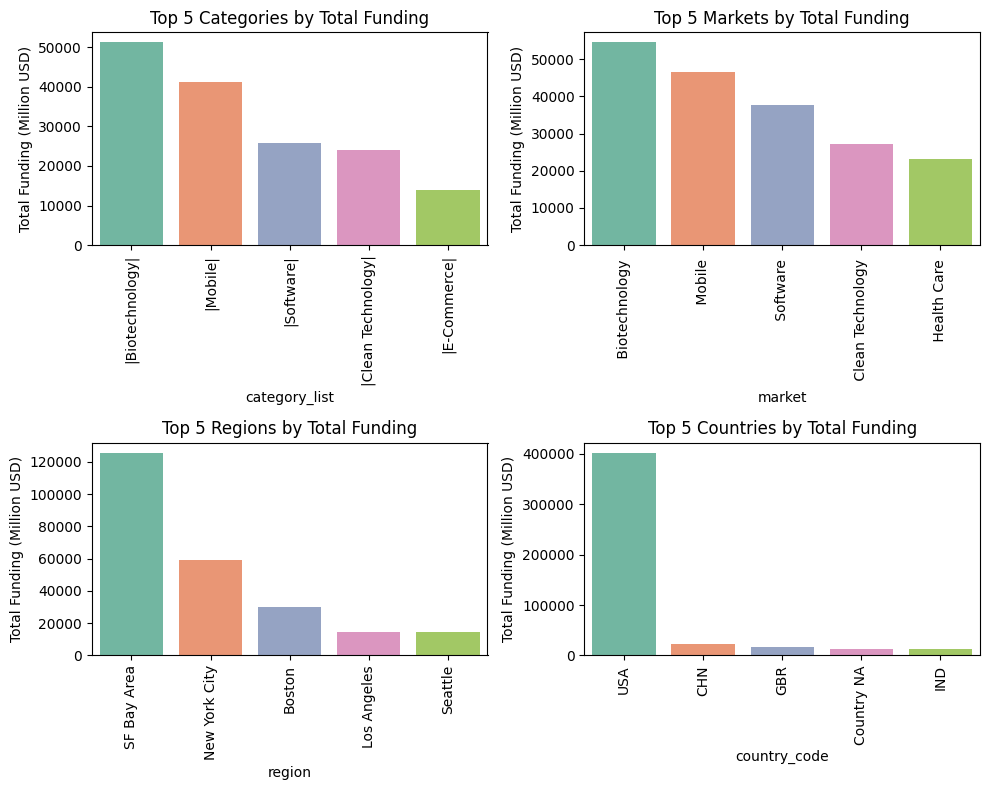

In [43]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

palette = sns.color_palette("Set2", 5)

# Funding Distribution across Category (Top 5)
sns.barplot(ax=axes[0][0], x='category_list', y='funding_total_usd',
            data=category_funding.sort_values(by='funding_total_usd', ascending=False).head(5),
            palette=palette, hue='category_list', dodge=False, legend=False)
axes[0][0].set_ylabel('Total Funding (Million USD)')
axes[0][0].set_title('Top 5 Categories by Total Funding')
axes[0][0].tick_params(axis='x', rotation=90)

# Funding Distribution across Market (Top 5)
sns.barplot(ax=axes[0][1], x='market', y='funding_total_usd',
            data=market_funding.sort_values(by='funding_total_usd', ascending=False).head(5),
            palette=palette, hue='market', dodge=False, legend=False)
axes[0][1].set_ylabel('Total Funding (Million USD)')
axes[0][1].set_title('Top 5 Markets by Total Funding')
axes[0][1].tick_params(axis='x', rotation=90)

# Funding Distribution across Region (Top 5 Regions only)
top_5_regions = region_funding.sort_values(by='funding_total_usd', ascending=False).head(5)
sns.barplot(ax=axes[1][0], x='region', y='funding_total_usd',
            data=top_5_regions, palette=palette, hue='region', dodge=False, legend=False)
axes[1][0].set_ylabel('Total Funding (Million USD)')
axes[1][0].set_title('Top 5 Regions by Total Funding')
axes[1][0].tick_params(axis='x', rotation=90)

# Funding Distribution across Country (Top 5 Countries only)
top_5_countries = country_funding.sort_values(by='funding_total_usd', ascending=False).head(5)
sns.barplot(ax=axes[1][1], x='country_code', y='funding_total_usd',
            data=top_5_countries, palette=palette, hue='country_code', dodge=False, legend=False)
axes[1][1].set_ylabel('Total Funding (Million USD)')
axes[1][1].set_title('Top 5 Countries by Total Funding')
axes[1][1].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

⏹ The "Biotechnology" category has attracted the most funding, totaling approximately \$50 billion, followed closely by "Mobile" at \$40 billion, and "Software" at \$30 billion. These sectors are drawing significant investments, indicating a robust interest in technological advancements and innovation.

⏹ The "San Francisco Bay Area" stands out as the leading region for funding, amassing about \$120 billion, followed by "New York City" with \$60 billion, and "Boston" with \$40 billion. These cities are vital hubs for startups and technology firms, consistently attracting substantial investment.

⏹ The "United States" leads all countries with approximately \$400 billion in funding, underscoring its strong commitment to supporting businesses and fostering innovation through substantial investments.



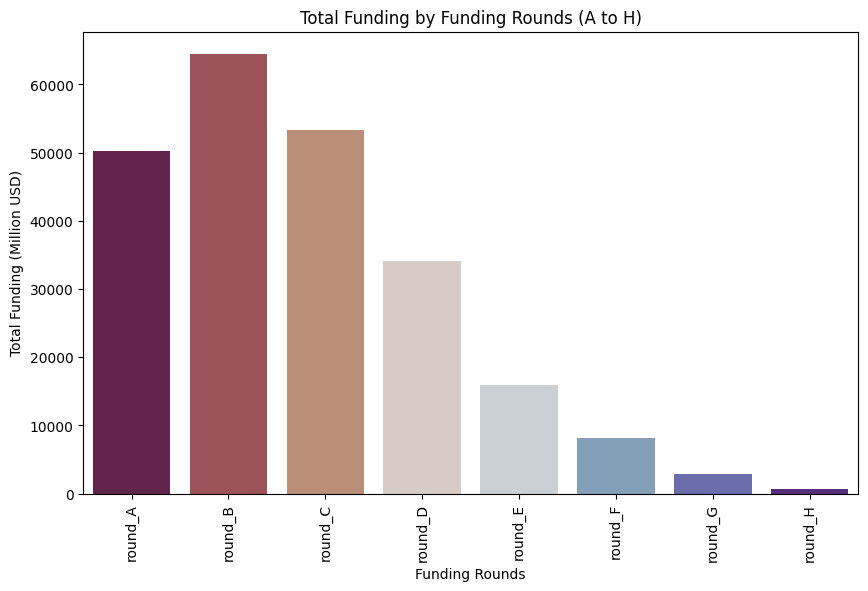

In [44]:
rounds_columns = ['round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

round_funding = filtered_data[rounds_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=round_funding.index, y=round_funding.values, palette="twilight_shifted_r")
plt.xticks(rotation=90)
plt.title('Total Funding by Funding Rounds (A to H)')
plt.xlabel('Funding Rounds')
plt.ylabel('Total Funding (Million USD)')
plt.show()

⏹ Round B Funding: Investors are most interested in Round B, with total investments exceeding approximately \$60 billion. This indicates strong confidence in companies that have shown growth and potential.

⏹ Round C Funding: Following Round B, Round C also attracts significant funding, with totals over \$50 billion. This suggests that companies at this stage are successfully scaling their operations.

⏹ Round A Funding: Round A sees similar interest, with investments around \$50 billion. This shows that early-stage startups can still secure substantial funding if they present a strong business idea.

⏹ Decline in Later Rounds: Funding in Rounds D, E, F, G, and H drops off significantly. This decline may indicate that fewer companies reach these stages or that investors are more cautious about committing large amounts in later rounds.

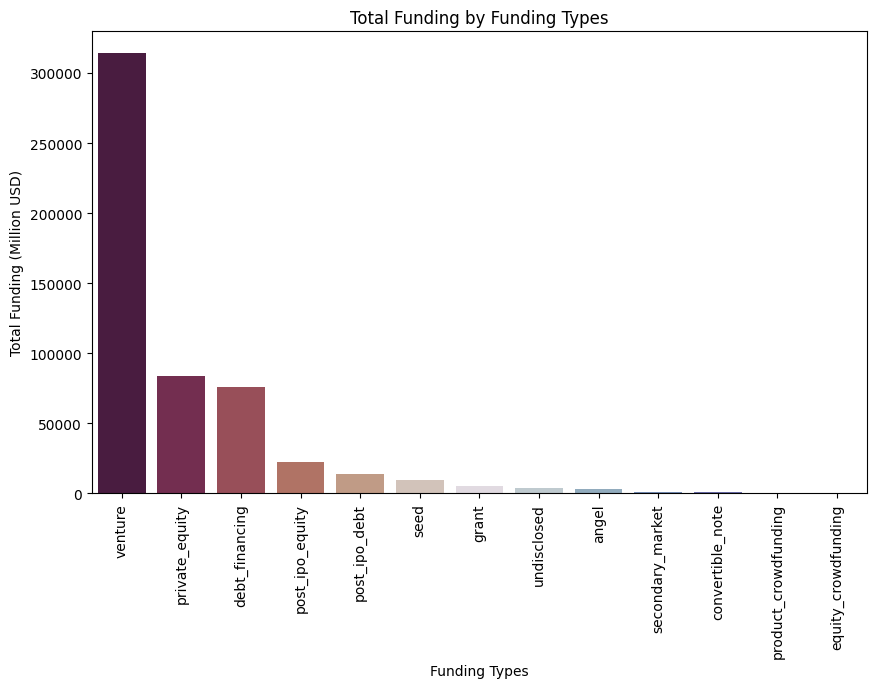

In [66]:
types_columns = ['seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

types_funding = filtered_data[types_columns].sum()
types_funding = types_funding.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=types_funding.index, y=types_funding.values, palette="twilight_shifted_r")
plt.xticks(rotation=90)
plt.title('Total Funding by Funding Types')
plt.xlabel('Funding Types')
plt.ylabel('Total Funding (Million USD)')
plt.show()

⏹ With approximately \$300 billion in total funding, venture capital stands as the dominant funding source. This highlights its pivotal role in fueling startup growth, especially in high-potential sectors like technology and innovation.

⏹ Private equity funding amounts to about \$100 billion. This indicates that investors primarily use it to help established businesses scale or prepare for strategic exits, such as acquisitions or public offerings.

⏹ Debt financing also contributes around \$100 billion. Companies, particularly in later stages, prefer this method to grow without giving up equity, but it comes with increased financial risks.

⏹ Funding types like angel, crowdfunding, and grants show much smaller amounts compared to venture and private equity, reflecting their niche roles in supporting early-stage startups or specific projects, like social causes or creative endeavors.

# **✨ Funding success with company status**

🔴 For better understanding of funding stages and types, categorizing the funding types into 3 categories - Early Stage funding, Mid Stage funding, and Late Stage funding
Funding rounds from round_A to round_H are not considering becasue of the assumption that all rounds are type of Venture funding types

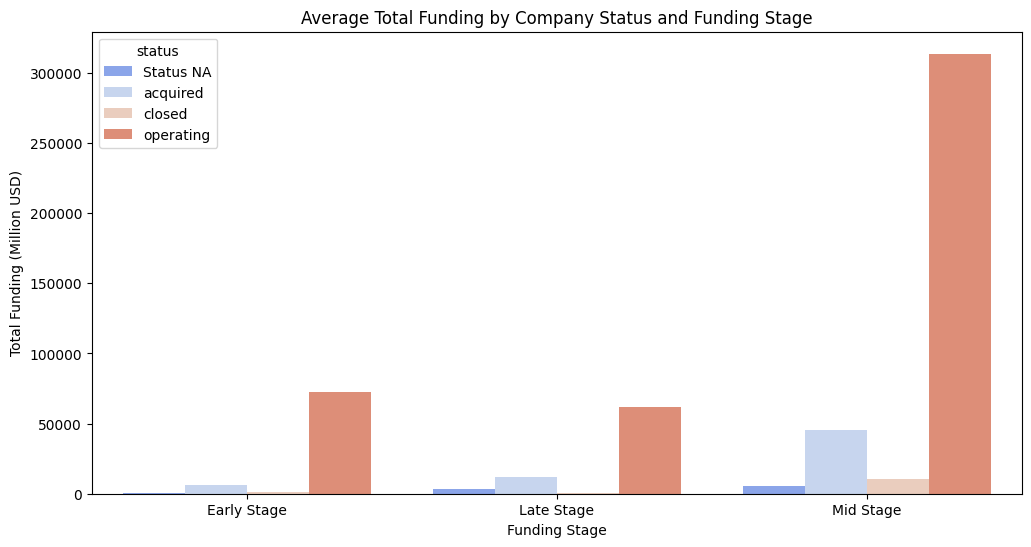

In [46]:
def categorize_funding_stage(row):
    if row[['seed', 'angel', 'equity_crowdfunding', 'grant', 'convertible_note']].sum() > 0:
        return 'Early Stage'
    elif row[['venture', 'product_crowdfunding', 'debt_financing']].sum() > 0:
        return 'Mid Stage'
    elif row[['private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'undisclosed']].sum() > 0:
        return 'Late Stage'

filtered_data['funding_stage'] = filtered_data.apply(categorize_funding_stage, axis=1)

status_funding = filtered_data.groupby(['status', 'funding_stage'])['funding_total_usd'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='funding_stage', y='funding_total_usd', hue='status', data=status_funding, palette='coolwarm')
plt.title('Average Total Funding by Company Status and Funding Stage')
plt.ylabel('Total Funding (Million USD)')
plt.xlabel('Funding Stage')
plt.show()

⏹ Mid-stage operating companies receive the highest total funding, exceeding \$300 billion USD, reflecting strong investor confidence in their growth and scalability.

⏹ Early-stage operating companies also attract substantial investments, securing over \$50 billion USD, highlighting their potential to capture market attention even in the initial phases.

⏹ Closed and acquired companies, both in early and mid stages, show significantly lower funding amounts, typically below \$50 billion USD, indicating challenges in sustaining investor confidence or growth.
Late-stage companies, regardless of their operational status, receive minimal funding compared to earlier stages, suggesting a shift in investor focus or reduced capital inflows at this point.

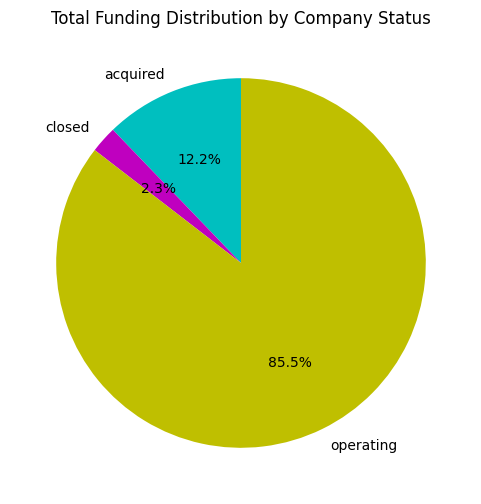

In [47]:
funding_by_status = filtered_data[filtered_data['status']!= 'Status NA'].groupby('status')['funding_total_usd'].sum()

plt.figure(figsize=(6, 6))
plt.pie(funding_by_status, labels=funding_by_status.index, autopct='%1.1f%%', colors=['c','m','y'], startangle=90)
plt.title('Total Funding Distribution by Company Status')
plt.show()

⏹ The analysis reveals that the majority of funding is concentrated in companies that are currently operating, accounting for a significant 85.5% of the total funding. This indicates strong investor confidence in businesses that are actively running, reflecting their potential for growth and sustainability.

Companies that have been acquired represent 12.2% of the total funding, highlighting the significant capital invested in firms that have reached a stage of successful acquisition, often seen as a positive exit strategy for investors.

On the other hand, only 2.3% of the funding is associated with closed companies, indicating that a relatively small portion of the investments has gone to businesses that have ultimately ceased operations.

⏹ The likelihood of success (acquisition or continued operation) increases as companies progress to mid and late stages, particularly if they receive higher rounds of funding. Early-stage companies, receiving lower funding, face more challenges in establishing themselves and have a higher chance of closing.


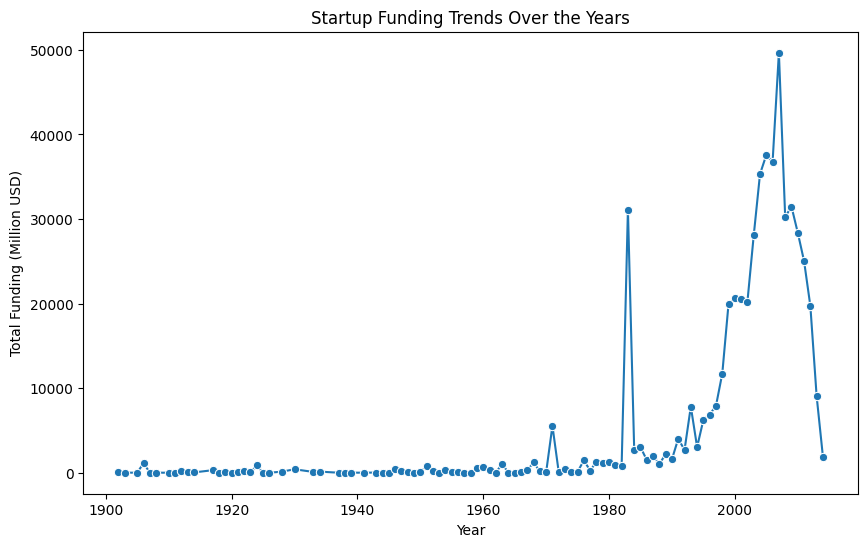

In [48]:
funding_trend = filtered_data.groupby('founded_year')['funding_total_usd'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=funding_trend, x='founded_year', y='funding_total_usd', marker='o')
plt.title('Startup Funding Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Funding (Million USD)')
plt.show()

⏹**Significant Growth in Startup Funding Post-2000:** The data reveals a remarkable surge in total startup funding after the year 2000, with funding levels reaching approximately \$50 billion USD. This represents a substantial increase compared to the 1980s, when total funding hovered around \$30 billion USD. The sharp rise in funding post-2000 indicates heightened investor confidence in emerging startups during the tech boom and reflects the rapid expansion of the startup ecosystem, particularly in industries like technology and innovation.

In [49]:
filtered_data.head()

,name,category_list,market,funding_total_usd,status,country_code,region,funding_rounds,founded_year,first_funding_year,...,round_C,round_D,round_E,round_F,round_G,round_H,funding before founded,founded-first funding,last-first funding,funding_stage
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1.75,acquired,USA,New York City,1,2012,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0,Early Stage
2,'Rock' Your Paper,|Publishing|Education|,Publishing,0.04,operating,EST,Tallinn,1,2012,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0,Early Stage
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1.50,operating,GBR,London,1,2011,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0,Early Stage
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,0.06,operating,USA,Dallas,2,2014,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,False,0,0,Early Stage
5,.Club Domains,|Software|,Software,7.00,Status NA,USA,Ft. Lauderdale,1,2011,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,False,2,0,Mid Stage


In [50]:
funding_columns = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                   'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
                   'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'funding_total_usd']

correlation_matrix = filtered_data[funding_columns].corr()

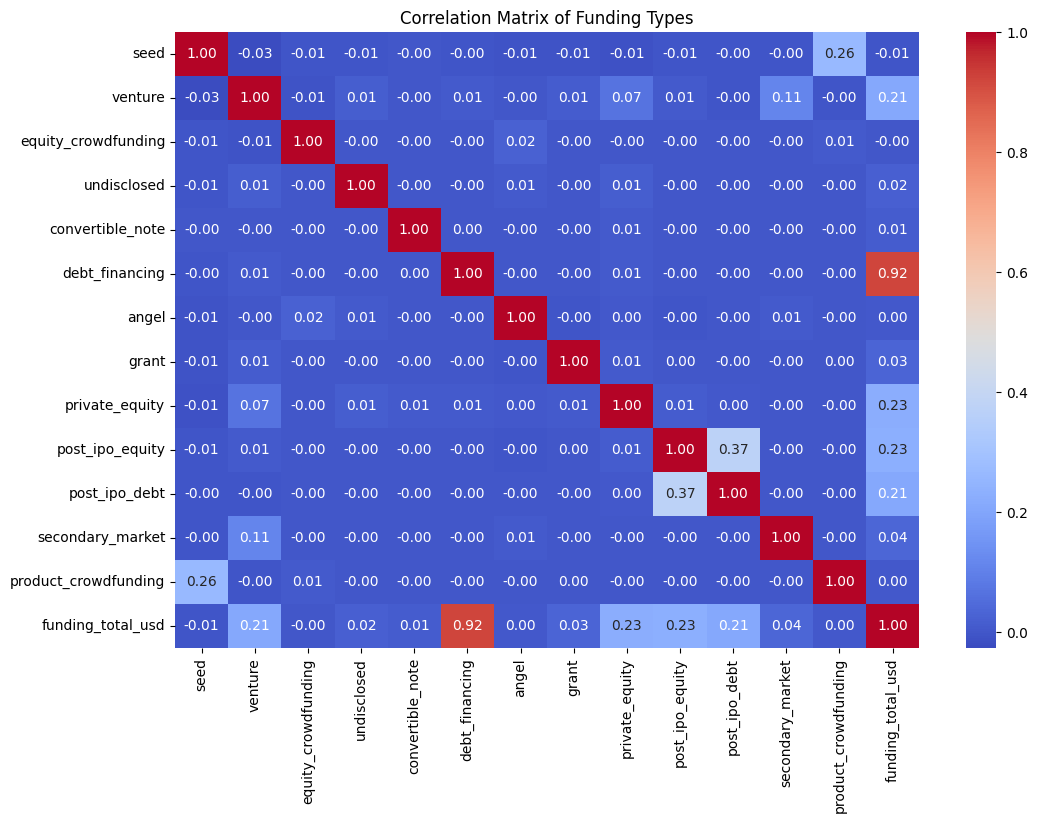

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Funding Types')
plt.show()

⏹ Debt Financing: Strong correlation of 0.92 with total funding, indicating it's a key driver of large funding amounts.

⏹ Private Equity & Venture: Moderate correlations of 0.23 and 0.21 with total funding, showing significant impact on overall capital.

⏹ Product Crowdfunding: Correlates 0.26 with seed funding, suggesting a focus on early-stage investments.

⏹ Low Correlation: Most other funding types show minimal impact on total funding, with values close to zero.

⏹ Diversified Funding: Low inter-type correlations imply diverse funding strategies across different stages.

# **✨ Statistical Analysis**

### ***Assumption -*** alpha = 0.05

🔴 Companies are categorized as successful or unsuccessful based on their operational status. Successful companies include those labeled as 'operating' and 'acquired,' indicating ongoing operations or successful acquisitions. Unsuccessful companies are those marked as 'closed,' showing they are no longer in operation.

T-test Results:
T-statistic = 2.0954, P-value = 0.0361


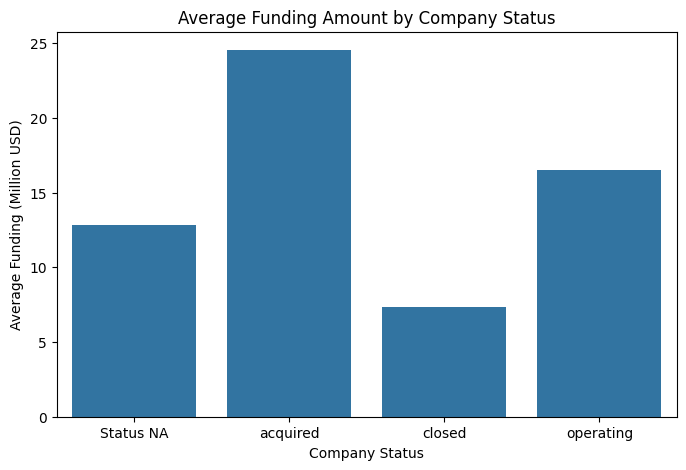

In [52]:
from scipy.stats import ttest_ind
successful_companies = filtered_data[filtered_data['status'].isin(['operating', 'acquired'])]
unsuccessful_companies = filtered_data[filtered_data['status'] == 'closed']


t_stat, p_value = ttest_ind(successful_companies['funding_total_usd'], unsuccessful_companies['funding_total_usd'])

print(f"T-test Results:\nT-statistic = {t_stat:.4f}, P-value = {p_value:.4f}")

avg_funding = filtered_data.groupby('status')['funding_total_usd'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='status', y='funding_total_usd', data=avg_funding)
plt.title('Average Funding Amount by Company Status')
plt.xlabel('Company Status')
plt.ylabel('Average Funding (Million USD)')
plt.show()

⏹ The T-test reveals a statistically significant difference in average funding amounts between successful (operating/acquired) and unsuccessful (closed) companies (p < 0.05).

⏹ This suggests that companies that remain operational or are acquired tend to receive higher funding, highlighting the potential impact of financial backing on a company's survival.

⏹ The bar chart visually emphasizes the stark contrast in average funding amounts between different company statuses.

⏹ Operating and acquired companies show significantly higher average funding compared to those that are closed.

In [53]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(filtered_data['status'], filtered_data['funding_stage'])


chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2_stat}, P-value: {p_value}")

Chi-Squared Statistic: 600.7282016587199, P-value: 1.6243748922637035e-126


⏹ A significant chi-squared statistic indicates that there is an association between company status and funding stages.

⏹ Understanding this relationship can guide strategic decisions on funding acquisition for companies at different life stages.

In [54]:
from scipy.stats import mannwhitneyu

operating_funding = filtered_data[filtered_data['status'] == 'operating']['funding_total_usd']
closed_funding = filtered_data[filtered_data['status'] == 'closed']['funding_total_usd']

stat, p_value = mannwhitneyu(operating_funding, closed_funding, alternative='two-sided')

print(f"Mann-Whitney U Statistic: {stat}, P-value: {p_value}")

Mann-Whitney U Statistic: 26939482.5, P-value: 1.9625342523519432e-39


⏹ The Mann-Whitney U test shows a significant difference in funding amounts between operating and closed companies, further confirming previous findings.

⏹ This non-parametric test suggests that even when distribution assumptions are violated, the funding disparity remains substantial.

In [55]:
from scipy.stats import kruskal

funding_operating = filtered_data[filtered_data['status'] == 'operating']['funding_total_usd']
funding_acquired = filtered_data[filtered_data['status'] == 'acquired']['funding_total_usd']
funding_closed = filtered_data[filtered_data['status'] == 'closed']['funding_total_usd']

stat, p_value = kruskal(funding_operating, funding_acquired, funding_closed)

print(f"Kruskal-Wallis H Statistic: {stat}, P-value: {p_value}")

Kruskal-Wallis H Statistic: 1311.426771763969, P-value: 1.687698255017193e-285


⏹ The Kruskal-Wallis test indicates that at least one group differs significantly in funding amounts across all statuses.

⏹ This reinforces the idea that funding success is not uniform across company statuses, potentially influencing strategic funding decisions.

In [56]:
from scipy.stats import spearmanr

spearman_corr, spearman_p_value = spearmanr(filtered_data['funding_total_usd'], filtered_data['founded_year'])

print(f"Spearman Correlation: {spearman_corr}, P-value: {spearman_p_value}")

Spearman Correlation: -0.49318607686281285, P-value: 0.0


⏹ Negative Correlation: A moderate negative correlation of -0.4932 suggests that newer companies tend to receive less funding compared to older ones.

⏹ Statistical Significance: The P-value of 0.0 indicates a significant relationship, allowing rejection of the null hypothesis. Suggesting that there is indeed a relationship between the age of the company (founded year) and the funding it receives. In this case, as companies get older, they tend to receive more funding, while newer companies receive less funding.

# **✨ Recommendations for Startups**
**⏹ Focus on Growth Stages:** Prioritize securing funding during Round B and C, as these rounds have demonstrated higher investment amounts and investor confidence.

**⏹ Market Selection:** Target sectors with substantial funding potential, such as biotechnology, mobile, and software, to enhance attractiveness to investors.

**⏹ Geographical Strategy:** Consider establishing a presence in leading funding regions like San Francisco, New York, and Boston to tap into local investment ecosystems and networks.

**⏹ Optimize Funding Strategy:** Explore a diversified funding approach by combining venture capital, private equity, and debt financing to maximize available resources and mitigate risks.

**⏹ Leverage Economic Trends:** Stay informed about economic factors influencing funding trends and align startup strategies accordingly to capitalize on emerging opportunities.

**⏹ Enhance Visibility and Credibility:** Build a strong online presence and track record to attract angel investors and crowdfunding opportunities, particularly for early-stage startups.

**⏹ Timing the Market:** Align funding requests with favorable economic conditions and industry trends to improve the chances of securing investments.

# **✨ Recommendations for Investors**
**⏹ Diversify Investment Portfolio:** Consider investing in a mix of early-stage and mid-stage startups, particularly in high-potential markets and technologies, to balance risk and reward.

**⏹ Monitor Company Progress:** Regularly assess startups’ operational status and funding stages to identify promising candidates for follow-on investments or additional support.

**⏹ Data-Driven Decisions:** Utilize insights from funding trends and correlations to inform investment strategies, focusing on sectors and regions showing consistent growth.

**⏹ Support with Resources:** Provide startups with not just funding but also mentorship and resources to help them scale effectively, particularly in mid-stage funding.

⏹ **Funding Source Strategy:** The type of funding a startup gets can reveal more about its growth plans than just how successful it is. For example, startups that take on a lot of debt may be better at managing their money and growing, while those that get private equity funding are usually further along and have established business models.

⏹ **Time and Rounds Matter:** Startups that go through multiple funding rounds and have more time between those rounds are more likely to grow successfully. This highlights how important patience and persistence are in the startup world.